In [16]:
import pandas as pd
import numpy as np


In [25]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
df=df.iloc[:,0:2]

In [27]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [29]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [31]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [38]:
df=df.drop_duplicates(keep='first')

In [39]:
df.duplicated().sum()

0

In [41]:
df.shape

(5169, 2)

# EDA

In [42]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [43]:
import matplotlib.pyplot as plt

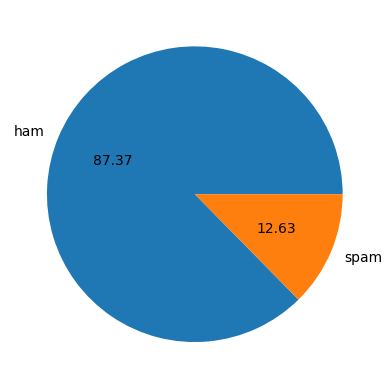

In [49]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [52]:
import nltk

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Riyal_Rock\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
df['num_characters']=df['text'].apply(len)

In [57]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [67]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [68]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
df.iloc[:,2:5].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
#ham
df[df['target']==0].iloc[:,2:5].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
#spam
df[df['target']==1].iloc[:,2:5].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [75]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

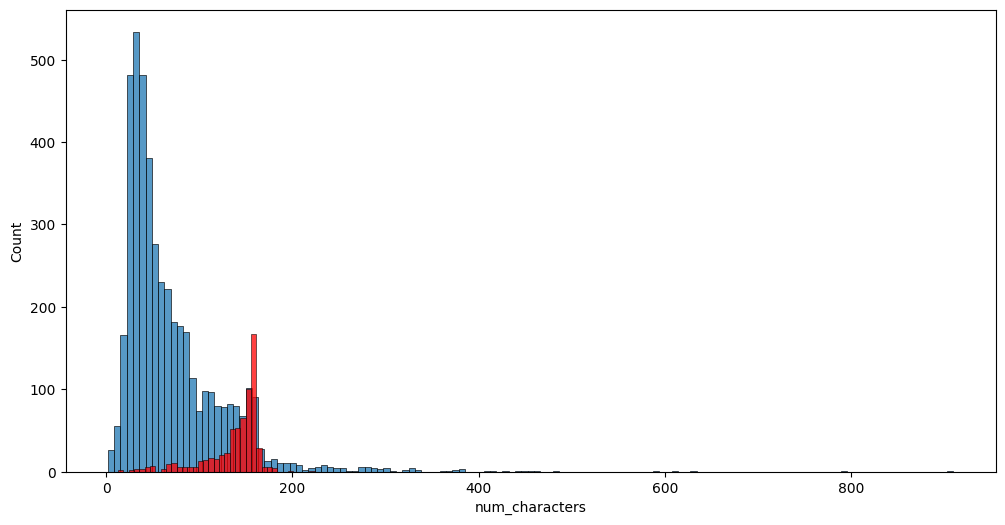

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\Riyal_Rock\AppData\Local\Temp\ipykernel_3160\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

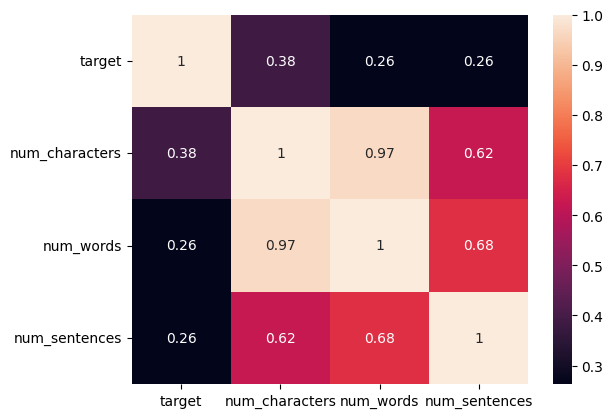

In [85]:
sns.heatmap(df.corr(),annot=True)

In [86]:
# #lower case
# tokenization
# remove special chars
# remove stopwords
# stemming

In [114]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Riyal_Rock\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem('hugging')

'hug'

In [124]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [127]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [126]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [128]:
df['transformed_text']=df['text'].apply(transform_text)

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, background_color='white',min_font_size=10)
spam_wordcloud=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

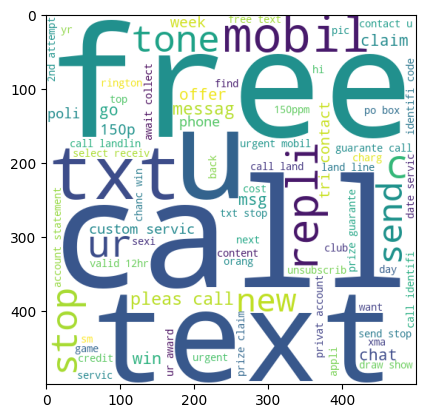

In [142]:
plt.imshow(spam_wordcloud)

In [143]:
ham_wordcloud=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

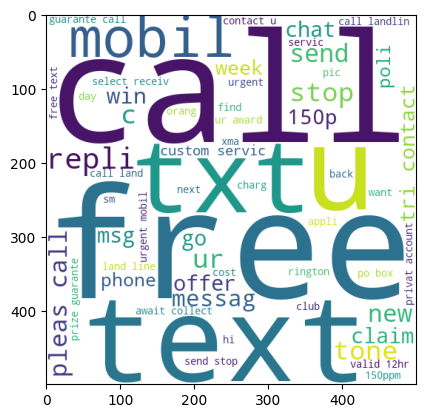

In [144]:
plt.imshow(ham_wordcloud)

In [155]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text']:
    for word in msg.split(" "):
        spam_corpus.append(word)

In [157]:
len(spam_corpus)

9939

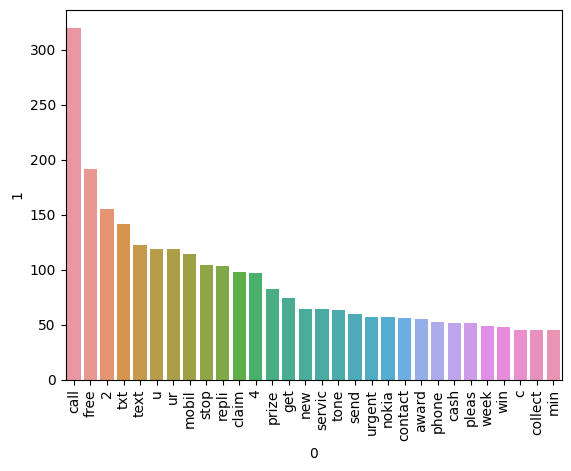

In [168]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

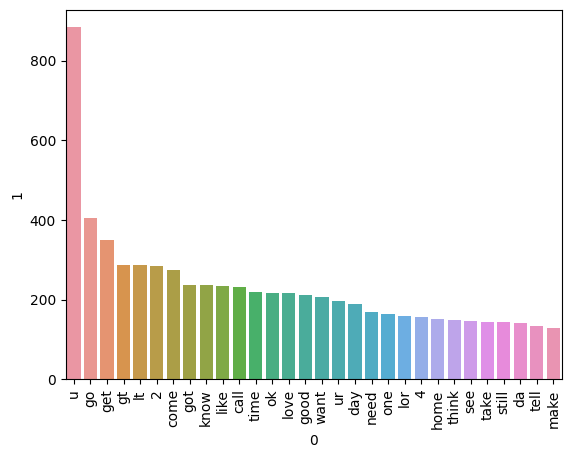

In [169]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg.split(" "):
        ham_corpus.append(word)
        
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [220]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [221]:
x=tfidf.fit_transform(df['transformed_text']).toarray()
# x=cv.fit_transform(df['transformed_text']).toarray()

In [222]:
y=df['target'].values

In [223]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [224]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [225]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [226]:
gnb.fit(xtrain,ytrain)
ypred1=gnb.predict(xtest)

print(accuracy_score(ytest,ypred1))
print(precision_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [227]:
mnb.fit(xtrain,ytrain)
ypred2=mnb.predict(xtest)

print(accuracy_score(ytest,ypred2))
print(precision_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [228]:
bnb.fit(xtrain,ytrain)
ypred3=bnb.predict(xtest)

print(accuracy_score(ytest,ypred3))
print(precision_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [230]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [231]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [232]:
def train_classfier(clf,xtrain,xtest,ytrain,ytest):
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    precision=precision_score(ytest,ypred)
    
    return  accuracy, precision

In [233]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classfier(clf,xtrain,xtest,ytrain,ytest)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

In [234]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [235]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [236]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))